In [20]:
import os
import pandas as pd

In [21]:
CaseName_Base = '9n'
CaseName_ByStages = CaseName_Base + '_ByStages'
CaseName_ByStages_1 = CaseName_Base + '_ByStages_OC_fy_1'
CaseName_ByStages_2 = CaseName_Base + '_ByStages_OC_fy_2'
CaseName_ByStages_3 = CaseName_Base + '_ByStages_OC_fy_3'
CaseName_ByStages_4 = CaseName_Base + '_ByStages_OC_fy_4'

In [22]:
Folder_A = 'A.The_full_year_MILP'
Folder_B = 'B.Operation_cost'
Folder_D = 'D.Representative_days_based_on_RES_and_Demand'
Folder_E = 'E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_F = 'F.Representative_days_based_on_Line_Benefit_NN'

In [23]:
DirName  = os.getcwd()

In [24]:
_path_0 = os.path.join(DirName, CaseName_Base)

In [25]:
def LoadingData(dir, folder, case):
    df = pd.read_csv(os.path.join(dir, folder, case, '3.Out', 'oT_Result_CostSummary_'+case+'.csv'), index_col=[0,1])
    df['CaseName'] = folder + ' - ' + case
    df = df.set_index('CaseName', append=True)
    return df

In [26]:
df_A = LoadingData(DirName, Folder_A, CaseName_Base)
df_B = LoadingData(DirName, Folder_B, CaseName_ByStages)
df_D = LoadingData(DirName, Folder_D, CaseName_ByStages)
df_E = LoadingData(DirName, Folder_E, CaseName_ByStages)
df_F = LoadingData(DirName, Folder_F, CaseName_ByStages_1)
df_G = LoadingData(DirName, Folder_F, CaseName_ByStages_2)
df_H = LoadingData(DirName, Folder_F, CaseName_ByStages_3)
df_I = LoadingData(DirName, Folder_F, CaseName_ByStages_4)

In [27]:
df = pd.concat([df_A, df_B, df_D, df_E, df_F, df_G, df_H, df_I], axis=0)

In [28]:
# select the row Total System Cost of dataframe df
df = df.reset_index()

In [29]:
df= df[['Cost/Payment','CaseName','MEUR']]

In [30]:
df = df.loc[df['Cost/Payment'] == 'Total          System Cost']

In [31]:
df = pd.pivot_table(df, values='MEUR', index=['CaseName'], aggfunc='first')

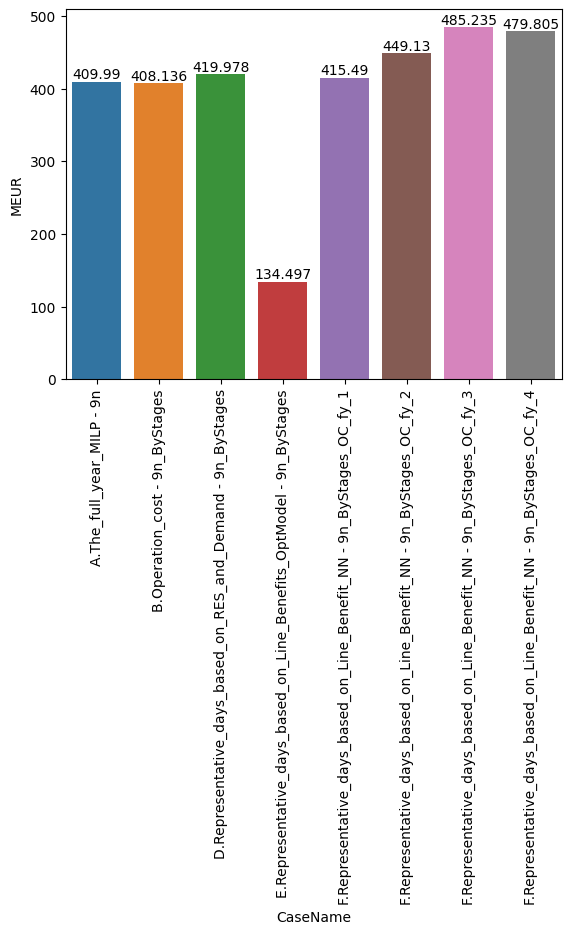

In [32]:
# import the necessary python packages
import seaborn as sns
import numpy as np

 
# create a bar plot by specifying
# x and y axis and the data to be used.
ax = sns.barplot(x='CaseName', y='MEUR', data=df.reset_index(),
                 errwidth=0)
 
# sns.barplot method will return a list of
# sub methods use containers method to access
# the text label of each bar by passing it
# through the ax.bar_label function use for
# loop to iterate through the list of
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)
ax.tick_params(axis='x', rotation=90)

In [33]:
df_A = pd.read_csv(os.path.join(DirName, Folder_A, CaseName_Base, '3.Out', 'oT_Result_CostSummary_'+CaseName_Base+'.csv'), index_col=[0,1])
df_B = pd.read_csv(os.path.join(DirName, Folder_B, CaseName_ByStages, '3.Out', 'oT_Result_CostSummary_'+CaseName_Base+'.csv'), index_col=[0,1])

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\erik_\\Documents\\GitHub\\JointResearch\\05. Models\\06.Benchmarking\\B.Operation_cost\\9n_ByStages\\3.Out\\oT_Result_CostSummary_9n.csv'

In [ ]:
df_A['CaseName']=CaseName_Base
df_B['CaseName']=CaseName_Base

In [ ]:
df_A = df_A.set_index('CaseName', append=True)

In [ ]:
df_A

MEUR
Period Cost/Payment               CaseName            
       Total          System Cost 3-bus     174.568533
2030   Generation Investment Cost 3-bus       0.000000
       Network    Investment Cost 3-bus       0.750000
       Generation  Operation Cost 3-bus     173.818533
       Consumption Operation Cost 3-bus       0.000000
       Emission              Cost 3-bus       0.000000
       Reliability           Cost 3-bus       0.000000